In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Read the dataset to python environment**

In [2]:
#load data
data=pd.read_excel('classification_iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**2.Do the necessary pre-processing steps**

In [3]:
#check the shape of data
data.shape

(150, 5)

In [4]:
#check the shape of data
data.shape

(150, 5)

In [5]:
#check the data types
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [6]:
#check the columns
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

filling missing values

In [7]:
#fill the missing values using mean
for i in ['SL', 'SW', 'PL', 'PW']:
      data[i]=data[i].fillna(data[i].mean())

In [8]:
#check null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

correalation 

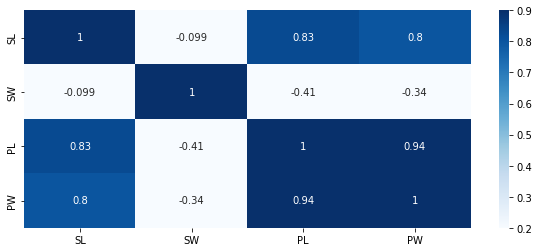

In [9]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

**Managing outliers**

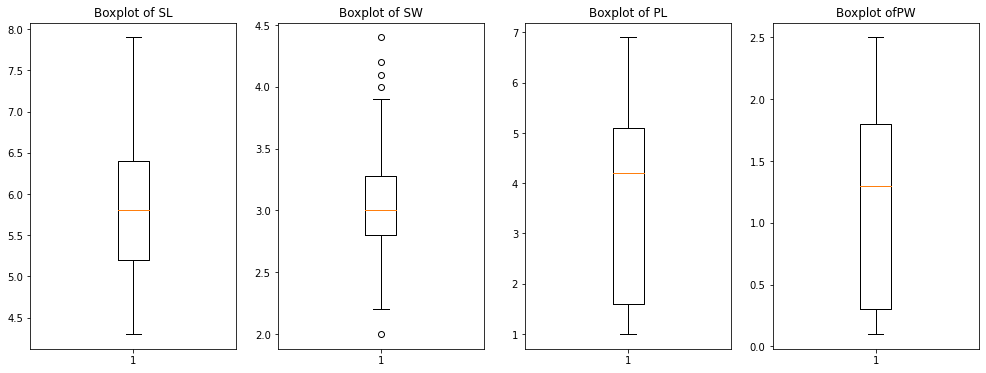

In [10]:
#boxplot for outlier detection
plt.figure(figsize=(17,6))
plt.subplot(1,4,1)
plt.boxplot(data['SL'])
plt.title('Boxplot of SL')
plt.subplot(1,4,2)
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')
plt.subplot(1,4,3)
plt.boxplot(data['PL'])
plt.title('Boxplot of PL')
plt.subplot(1,4,4)
plt.boxplot(data['PW'])
plt.title('Boxplot ofPW')
plt.show()

In [11]:
#find Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')


In [12]:
#print Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
print(Q1)
print(Q2)
print(Q3)


2.8
3.0
3.25


In [13]:
#find inter quartile range
IQR=Q3-Q1
IQR

0.4500000000000002

In [14]:
#find upper and lower limit
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [15]:
#print upper and lower limit
print(low_lim)
print(upp_lim)

2.1249999999999996
3.9250000000000003


In [16]:
#find outliers
outlier=[]
for x in data['SW']:
  if((x>upp_lim)or(x<low_lim)):
    outlier.append(x)

In [17]:
#print outliers
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [18]:
#find the index value  with outliers
index = data[(data['SW']>upp_lim)|(data['SW']<low_lim)].index

In [19]:
#print index
index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

label encoding

In [20]:
#to convert categorical data to numerical data
#import label encoder
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder=LabelEncoder()

In [22]:
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [23]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


**min max scaling**

In [24]:
X1=data.drop(['Classification'],axis=1)

In [25]:
X1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.808480,0.421884,1.725479,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
#import minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [27]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [28]:
X1=min_max_scaler.fit_transform(X1)

In [29]:
type(X1)

numpy.ndarray

In [30]:
X1=pd.DataFrame(X1,columns=['SL','SW','PL','PW'])

In [31]:
data1=data.drop(['SL','SW','PL','PW'],axis=1)

In [32]:
data1

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [33]:
data1=pd.concat([data1,X1],axis=1)

In [34]:
data1.describe()

,Classification,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,0.432207,0.437211,0.467161,0.457778
std,0.819232,0.224578,0.175785,0.292454,0.317984
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.333333,0.101695,0.083333
50%,1.000000,0.416667,0.416667,0.542373,0.500000
75%,2.000000,0.583333,0.531250,0.694915,0.708333
max,2.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#split train and test data
X=data1.drop(['Classification'],axis=1)
y=data1['Classification']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

**logistic regression**

In [38]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor_model=lor.fit(X_train,y_train)
y_predict_lor=lor_model.predict(X_test)

In [39]:
y_predict_lor

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

confusion matrix

In [40]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [41]:
#confusion matrix
confusion_matrix(y_test,y_predict_lor)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

precision,accuracy and recall score

In [42]:
#import precision score and recall score
from sklearn.metrics import precision_score,recall_score

In [43]:
#precision score
precision_score(y_test,y_predict_lor,pos_label=1,average='micro')

1.0

In [44]:
#recallscore
recall_score(y_test,y_predict_lor,pos_label=1,average='micro')

1.0

In [45]:
#check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_lor)

1.0

**kNN model**

In [46]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
metric_k=[]
neighbors=range(3,20)
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(X_train,y_train)
  y_pred_kNN=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred_kNN)
  metric_k.append(acc)

In [48]:
#print metric
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

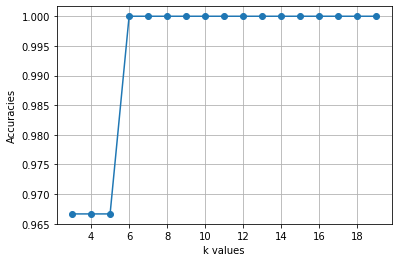

In [49]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [50]:
classifier= KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [51]:
#find confusion matrix
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [52]:
#find precision score
precision_score(y_test,y_pred_kNN,pos_label=1,average='micro')

0.9666666666666667

In [53]:
#find recall score
recall_score(y_test,y_pred_kNN,pos_label=1,average='micro')

0.9666666666666667

In [54]:
#find accuracy score
accuracy_score(y_test,y_pred_kNN)

0.9666666666666667

**Support Vector Machine (SVM) Classification**

In [55]:
#import Support Vector Classification
from sklearn.svm import SVC

kernel type- linear

In [56]:
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [57]:
#find confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [58]:
#find precision score
precision_score(y_test,y_pred_svm,pos_label=1,average='micro')

1.0

In [59]:
#find recall score
recall_score(y_test,y_pred_svm,pos_label=1,average='micro')

1.0

In [60]:
#find accuracy score
accuracy_score(y_test,y_pred_svm)

1.0

kernel type-rbf

In [61]:
svm_clf2=SVC(kernel='rbf')
svm_clf2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_clf2.predict(X_test)

In [62]:
#find confusion_matrix
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [63]:
#find precision score
precision_score(y_test,y_pred_svm2,pos_label=1,average='micro')

0.9666666666666667

In [64]:
#find recall score
recall_score(y_test,y_pred_svm2,pos_label=1,average='micro')

0.9666666666666667

In [65]:
#find accuracy score
accuracy_score(y_test,y_pred_svm2)

0.9666666666666667

**Decision tree classification**

In [66]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_clf= DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [68]:
#find confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [69]:
#find precision score
precision_score(y_test,y_pred_dt,pos_label=1,average='micro')

1.0

In [70]:
#find recall score
recall_score(y_test,y_pred_dt,pos_label=1,average='micro')

1.0

In [71]:
#find accuracy score
accuracy_score(y_test,y_pred_dt)

1.0

**random forest classification**

In [72]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [74]:
#find confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [75]:
#find precision score
precision_score(y_test,y_pred_rf,pos_label=1,average='micro')

1.0

In [76]:
#find recall score
recall_score(y_test,y_pred_rf,pos_label=1,average='micro')

1.0

In [77]:
#find accuracy score
accuracy_score(y_test,y_pred_rf)

1.0

***Except for kNN model and SVM model with kernal rbf, accuracy is same for all other classification models***

***kNN and SVM model with kernal rbf has 0.97 accuracy and all other models have accuracy 1***

***So logistric regression,svm with kernal linear,decision tree and random forest are better models than kNN and SVM model with kernal rbf***


(without scaling, accuracy for svm with kernel rbf was also 1)




